In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from copy import deepcopy
%matplotlib inline 

In [7]:
from PynPoint.core import Pypeline, InputPort

In [8]:
pipeline = Pypeline("/Users/markusbonse/Desktop/PSF_stabi_database",
                    "/Users/markusbonse/Desktop/PSF_stabi_database",
                    "/Users/markusbonse/Desktop/PSF_stabi_results")

## Access Lines in time

In [9]:
line_port_no_wv = InputPort("psf_normalized",data_storage_in=pipeline.m_data_storage)
line_port_hard_wv = InputPort("wavelet_denoised_soft",data_storage_in=pipeline.m_data_storage)

In [10]:
indices = [[ 66,  76],
           [ 40,  60],
           [ 75,  30]]

In [164]:
def plot_ind(ax, index, bg_color):
    test_line_no_wv = line_port_no_wv[:,index[0], index[1]]
    test_line_hard_wv = line_port_hard_wv[:,index[0], index[1]]

    ax.plot(test_line_no_wv, lw=0.1, c=bg_color)
    ax.set_ylim((np.min(test_line_no_wv) - 20, 500))
    ax.plot(test_line_hard_wv, lw=1, c="k")
    ax.set_ylabel("flux", size=12)
    ax.text(22500, np.min(test_line_no_wv) + 14, u'pixel x= ' +str(index[0]) + " y= " + str(index[1]))

In [160]:
import os
def load_all_imgs(path):
    images = []
    for filename in os.listdir(path):
        if filename.endswith(".png"): 
            images.append(mpimg.imread(path + filename))
    return images

In [161]:
images_no_wv = load_all_imgs("/Users/markusbonse/Desktop/no_wv_frames/")
images_soft_wv = load_all_imgs("/Users/markusbonse/Desktop/soft_wv_frames/")

In [187]:
def plot_img(ax, img, frame):
    ax.imshow(img, origin="lower")
    
    for i in range(len(indices)):
        ax.scatter(x=indices[i][0],
                   y=indices[i][1], 
                   c=colors[i], 
                   s=60,
                   marker="+")
        ax.text(5, 9, "frame \n" + str(frame), 
                size=8, 
                va='center',
                color="w")

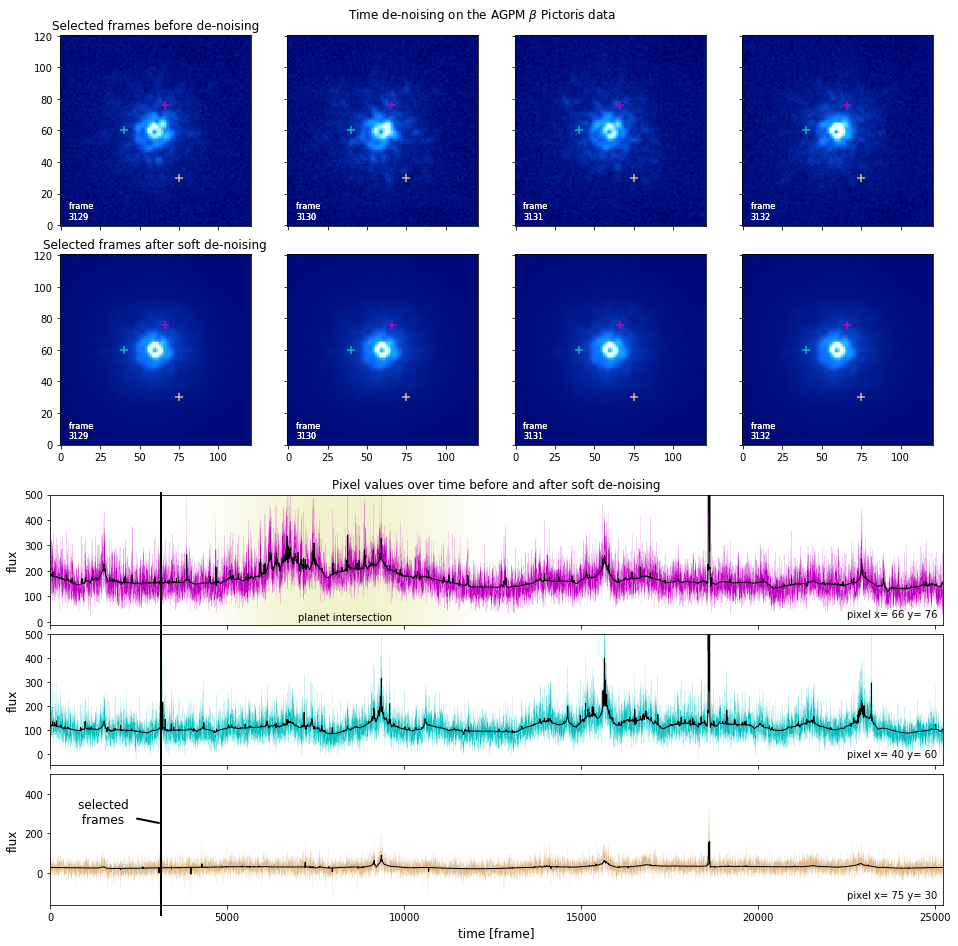

In [225]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.image as mpimg

space = (5, len(images_soft_wv))

gs0 = gridspec.GridSpec(2, 1, hspace=0.12)

fig= plt.figure(figsize=(16, 16))

gsimgs = gridspec.GridSpecFromSubplotSpec(2, len(images_soft_wv), 
                                          subplot_spec=gs0[0],
                                          hspace=0.15,
                                          wspace=0.08)

gsplots = gridspec.GridSpecFromSubplotSpec(len(indices), 1,
                                           subplot_spec=gs0[1],
                                           hspace=0.07)

# add the images
j = 0

frames = [3129, 3130, 3131, 3132]
for i in range(len(images_no_wv)):
    ax1 = fig.add_subplot(gsimgs[0,i])
    plot_img(ax1, images_no_wv[::-1][i], frames[i])
    plt.setp(ax1.get_xticklabels()[:], visible=False)
    
    ax2 = fig.add_subplot(gsimgs[1,i])
    plot_img(ax2, images_soft_wv[::-1][i], frames[i])
    
    if j>0:
        plt.setp(ax1.get_yticklabels()[:], visible=False)
        plt.setp(ax2.get_yticklabels()[:], visible=False)
    else:
        ax1.set_title("Selected frames before de-noising")
        ax2.set_title("Selected frames after soft de-noising")
    j+=1   

# add plots
colors = ["m", "c", "burlywood"]

# planet
ax_planet = fig.add_subplot(gsplots[0])

# shade planet region
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["w","y"])
section = np.arange(5000,11500, 1)
test_line_no_wv = line_port_no_wv[:,indices[0][0], indices[0][1]]

gradient = np.append(np.linspace(0,1, 2000), np.ones(1000))
gradient = np.append(gradient, np.linspace(1,0, 2000)).reshape(1, -1)
ax_planet.imshow(gradient , 
                 extent=[4000, 12500, -100, 500],
                 aspect='auto', 
                 alpha=0.2,
                 cmap=cm1)

# plot planet
plot_ind(ax_planet, indices[0], colors[0])
plt.setp(ax_planet.get_xticklabels()[:], visible=False)
ax_planet.set_xlim(xmin=[0, len(test_line_no_wv)])
ax_planet.set_title("Pixel values over time before and after soft de-noising", 
                    fontsize=12)
ax_planet.text(7000, 
               np.min(test_line_no_wv) + 14, 
               "planet intersection",
               va='center')

# inner
ax_inter = fig.add_subplot(gsplots[1], sharex=ax_planet)
plot_ind(ax_inter, indices[1], colors[1])
plt.setp(ax_inter.get_xticklabels()[:], visible=False)
ax_inter.set_xlim(xmin=[0, len(test_line_no_wv)])

# outer
ax_outer = fig.add_subplot(gsplots[2], sharex=ax_planet)
plot_ind(ax_outer, indices[2], colors[2])
ax_outer.set_xlim(xmin=[0, len(test_line_no_wv)])

ax_outer.set_xlabel("time [frame]", size=12)

ax_outer.axvline(x=3129,
                 ymin=-0.08,
                 ymax=3.15,
                 c="black",
                 linewidth=2, 
                 clip_on=False)
ax_outer.annotate('selected \n frames', 
                  xy=(3129, 250), 
                  xytext=(800, 250),
                  size=12,
                  arrowprops=dict(arrowstyle="-",
                                  lw=2,
                                  facecolor='black',
                                  connectionstyle="arc3"))

st = fig.suptitle(r"Time de-noising on the AGPM $\beta$ Pictoris data", 
                  fontsize=12)
st.set_y(0.905)

In [226]:
fig.savefig("Plots/time_stabilization.pdf")